In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1126,Super built-up Area,Ready To Move,Choodasandra,2 BHK,GRhtiru,1115,2.0,2.0,50.00
597,Built-up Area,Ready To Move,RMV Extension,3 BHK,DSureSi,1630,3.0,2.0,85.00
13070,Super built-up Area,Ready To Move,Jalahalli East,2 BHK,ShshaSa,1020,2.0,1.0,42.48
7713,Super built-up Area,18-Dec,Hennur Road,2 BHK,Shxorm,1195,2.0,2.0,73.00
379,Super built-up Area,18-May,Jalahalli,3 BHK,Shard T,1400,3.0,0.0,77.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df.drop(['area_type','availability','society'],axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [8]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df2.dropna(subset=['size','bath','balcony'],how='all',inplace=True)

In [10]:
df2.isnull().sum()

location        1
size            0
total_sqft      0
bath           57
balcony       593
price           0
dtype: int64

In [11]:
df2.dropna(subset=['bath','balcony'],how='all',inplace=True)

In [12]:
df2.isnull().sum()

location        1
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [13]:
df2[df2['location'].isnull()]

,location,size,total_sqft,bath,balcony,price
568,NaN,3 BHK,1600,3.0,2.0,86.0


In [16]:
df2.drop(568,inplace=True)

In [17]:
df2.isnull().sum()

location        0
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [18]:
df2.balcony.describe()

count    12710.000000
mean         1.584343
std          0.817287
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [31]:
df2.price.describe()

count    13246.000000
mean       112.389392
std        149.076587
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

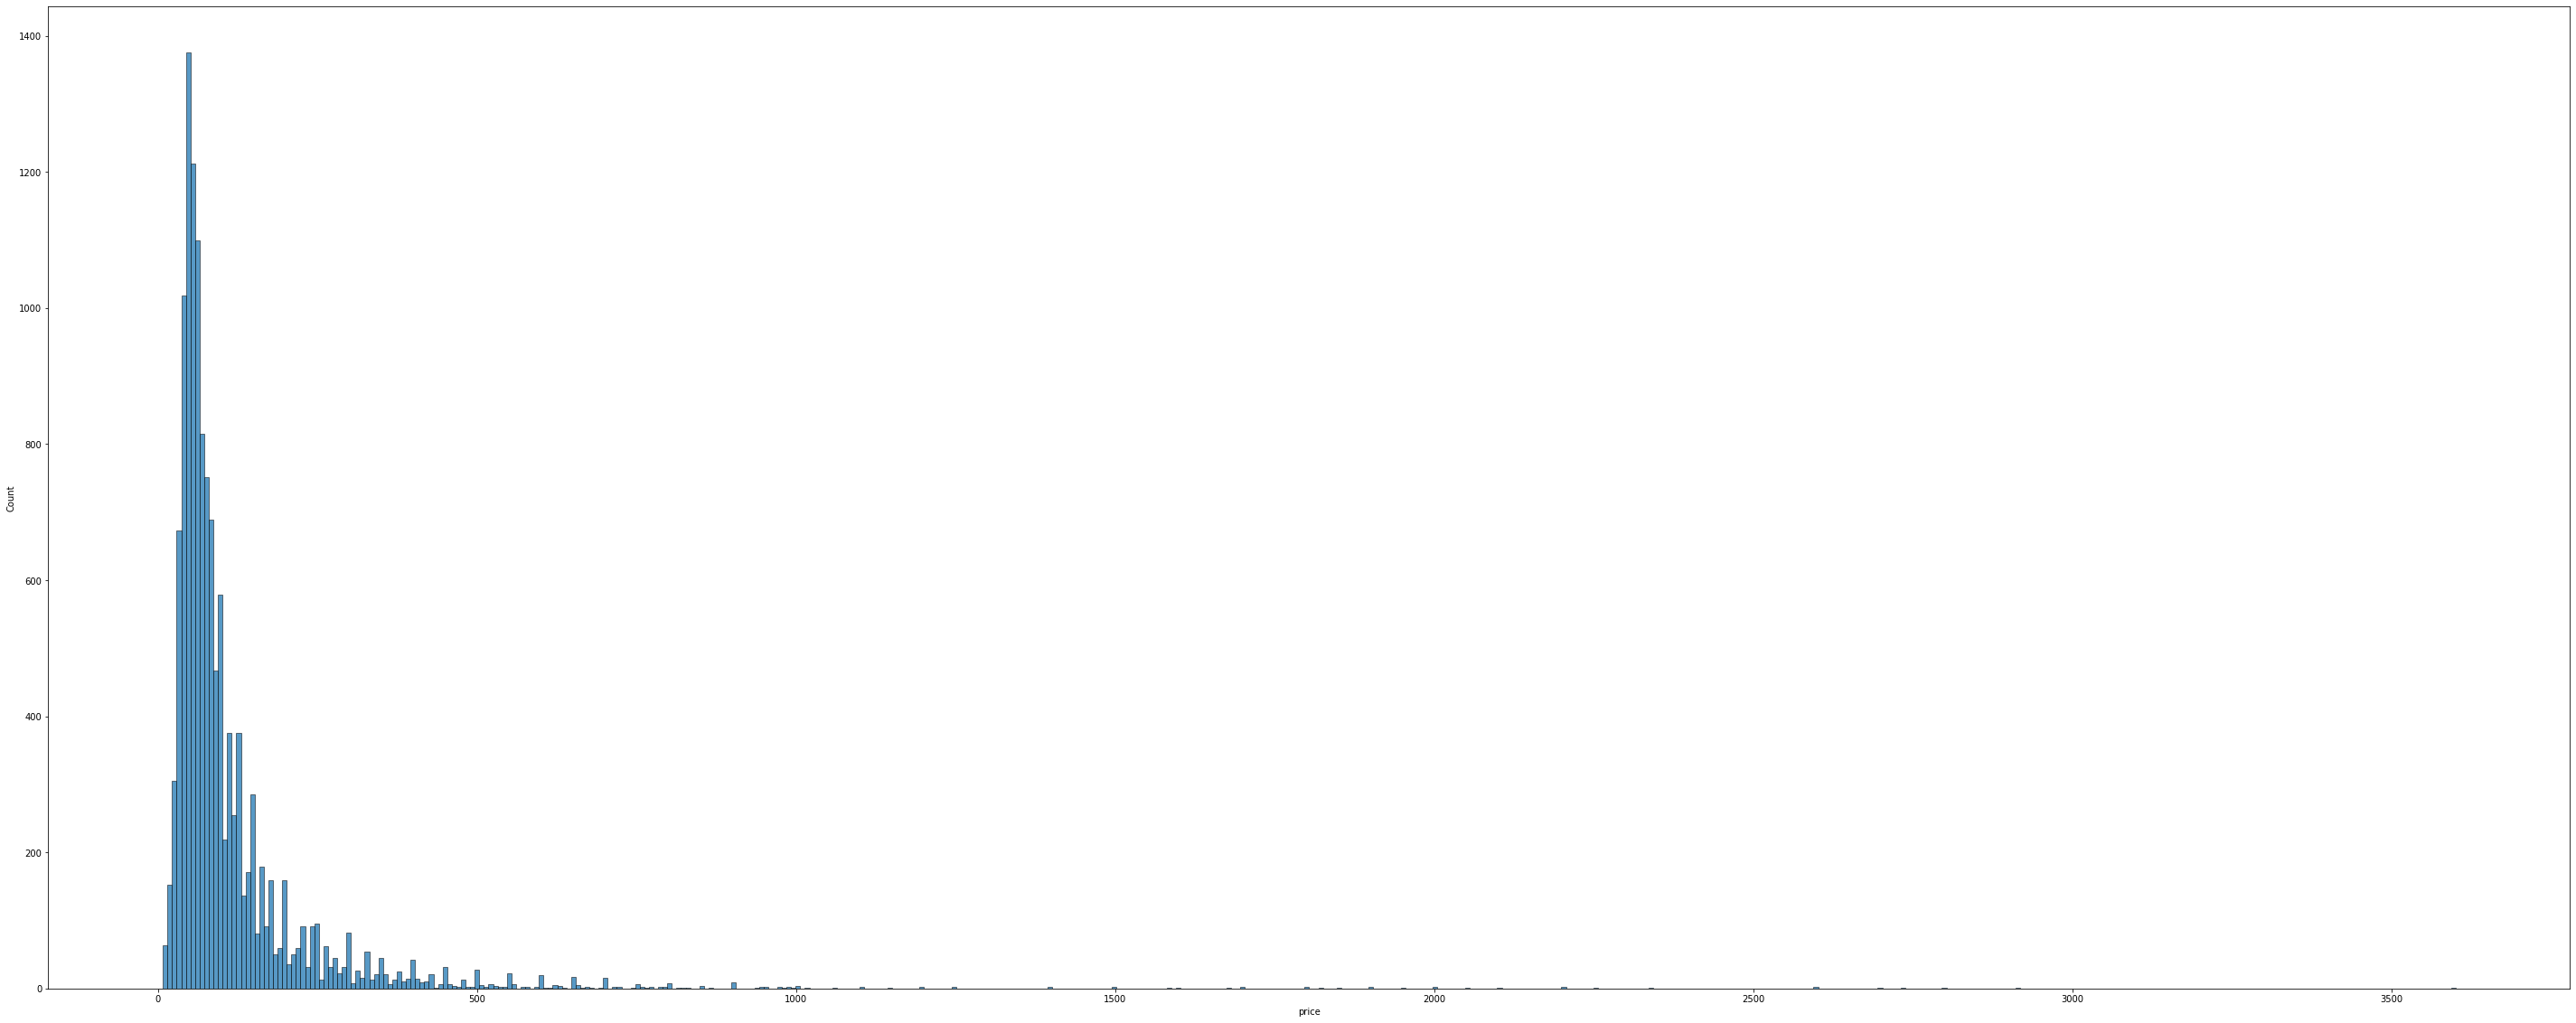

In [44]:
plt.figure(figsize=(50,20))
sns.histplot(df2.price,bins=500)

In [26]:
df2[(df2.balcony.isnull()) & (df2['price']>50) & (df2['price']<70)].shape

(29, 6)

In [27]:
df2[(df2['balcony']==1) & (df2['price']>90) & (df2['price']<9000)]
# 246 with 3 balcony and price between 90-70 with 1 is 631 2 is 716
# 324 with 3 balcony and price between 50-70  with 1 is 1173  2 is 1129
# 876 with 3 balcony and price between 220000-90 with 1 is 1158  2 is 1900

,location,size,total_sqft,bath,balcony,price
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
21,Binny Pete,3 BHK,1755,3.0,1.0,122.00
23,Bellandur,3 BHK,1767,3.0,1.0,103.00
47,Whitefield,2 BHK,1459,2.0,1.0,94.82
48,KR Puram,2 Bedroom,800,1.0,1.0,130.00
...,...,...,...,...,...,...
13289,Hebbal,2 BHK,1349,2.0,1.0,96.80
13290,Sarjapur Road,4 BHK,4050,2.0,1.0,450.00
13293,Sarjapur Road,4 BHK,2425,5.0,1.0,195.00
13308,Bannerghatta Road,3 BHK,1527,3.0,1.0,142.00


In [30]:
df2[(df2['balcony']==2) & (df2['price']>70) & (df2['price']<90)]

,location,size,total_sqft,bath,balcony,price
15,Mysore Road,2 BHK,1175,2.0,2.0,73.50
27,Whitefield,3 BHK,1610,3.0,2.0,81.00
53,Lakshminarayana Pura,2 BHK,1185,2.0,2.0,75.00
82,Yelahanka,2 BHK,1326,2.0,2.0,78.00
86,Kanakpura Road,3 BHK,1665,3.0,2.0,88.00
...,...,...,...,...,...,...
13156,Vittasandra,3 BHK,1648,3.0,2.0,85.00
13178,Kasavanhalli,2 BHK,1121,2.0,2.0,75.00
13194,Sahakara Nagar,2 BHK,1291,2.0,2.0,72.30
13210,Sarjapur Road,3 BHK,1850,3.0,2.0,89.00
